<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

load korpus

In [24]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
df = pd.read_csv(url1)

In [25]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

pilih model

In [6]:
pakai_model=2

load model

In [8]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 5.2 MB/s 


In [26]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpusblogspertiga(preptambah).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpusblogspertiga(preputama).glove')

cek model

In [10]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1042724, 100)


In [11]:
if pakai_model == 1:
  print(model.wv["moment"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['moment']])

[ 9.12555590e-01  3.56388237e+00  6.15381693e+00  8.32281697e+00
  1.48340044e+00  3.71583047e+00 -9.35538511e-01 -9.07829027e+00
  1.21876146e+00 -3.18793016e+01 -3.76620812e+00 -1.08974577e+00
  3.73468210e+00  5.34399197e+00  6.96963931e+00 -4.65188739e-01
  2.02605202e+00 -4.91942660e+01 -3.12316027e+01 -9.13629593e+00
  6.09421563e-01  1.06929220e+01 -3.77779200e-02 -2.35758805e+00
 -8.61683966e+00  1.05703459e+01 -4.53946964e+00 -1.48742616e+00
  3.98970588e+00  6.32045585e+00 -7.69349489e-02  1.62413706e+01
 -2.19441028e+00 -2.10975485e+01  1.72432988e-01  2.01625851e+01
  1.22017545e+01 -4.46702260e+00  3.01653891e+01  1.00893365e+01
  2.60940625e+01  9.57763535e-01  9.14267410e+00 -3.85777797e+00
 -1.98793080e+01  3.24945585e+00  1.64813296e+01 -2.15349206e+01
 -1.79627727e+01  2.54033610e+01 -2.62122123e+00  2.50457088e-01
  9.39536126e+00 -2.04280955e+01 -2.18253401e+01  7.92473810e+00
 -1.48202441e+00 -1.25997002e+01  1.85996917e+00  7.39892153e+00
 -1.24488063e+01  2.62378

average base ekstraksi fitur

In [27]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

In [28]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


klasifikasi svm

In [14]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [15]:
def klasifikasi(y_pred):
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

In [29]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')

In [30]:
acc10k=cross_val_score(clf, X, y, cv=10)

In [31]:
acc10k

array([0.43085106, 0.44946809, 0.43085106, 0.42952128, 0.42819149,
       0.42287234, 0.44474035, 0.42609854, 0.43009321, 0.42743009])

In [32]:
meanacc10k=np.mean(acc10k)

In [33]:
meanacc10k

0.4320117502903929

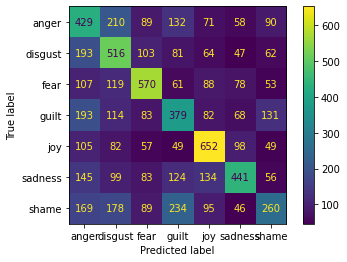

0.43201170835550823
(0.4354062777511668, 0.43139242566478575, 0.42894933170681027, None)


In [34]:
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

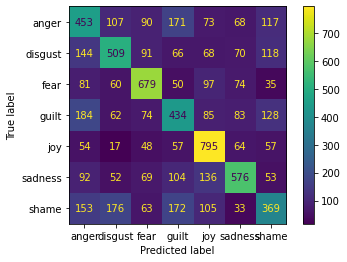

0.5075838211814795
(0.5042923342962513, 0.506657232981501, 0.5033495702478372, None)


In [ ]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

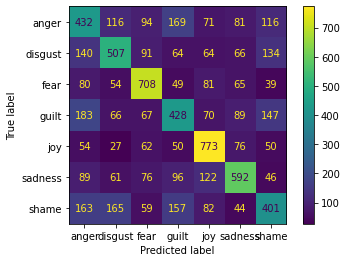

0.5110431080361895
(0.5069028791644624, 0.5101455584023582, 0.507404184632631, None)


In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)